# ```Importing libraries & Reading the data```

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

In [161]:
#reading the data
df=pd.read_csv("D:/Downloads/water_potability - water_potability.csv")

In [162]:
#displaying first 5 elements
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [163]:
#seeing the dimentins of data
df.shape

(3276, 10)

In [164]:
df.info() #checking data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [165]:
#analysing statisical mesurmants data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# ```data preprocessing```

## nulls handling

### calculate percenatage

In [166]:
#calculating null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [167]:
print(df.isnull().sum()/len(df) * 100)


ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


we will drop rows that conatin nulls in ph and Trihalomethanes columns

In [168]:

# df.dropna(subset=['Trihalomethanes'], inplace=True)
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

we will check whether 'sulphate' and 'ph' column is normally distributed or not to replace with mean

### distrubution check

In [169]:
from scipy import stats
skewness = stats.skew(df['Sulfate'])
print(f"Skewness: {skewness}")
skewness = stats.skew(df['ph'])
print(f"Skewness: {skewness}")



Skewness: nan
Skewness: nan


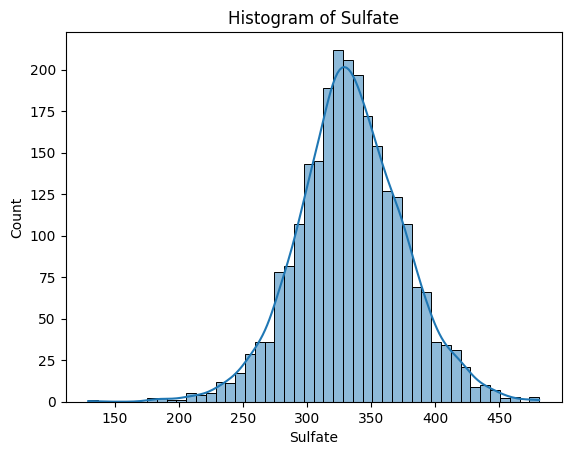

In [170]:
sns.histplot(df['Sulfate'], kde=True)
plt.title('Histogram of Sulfate')
plt.show()


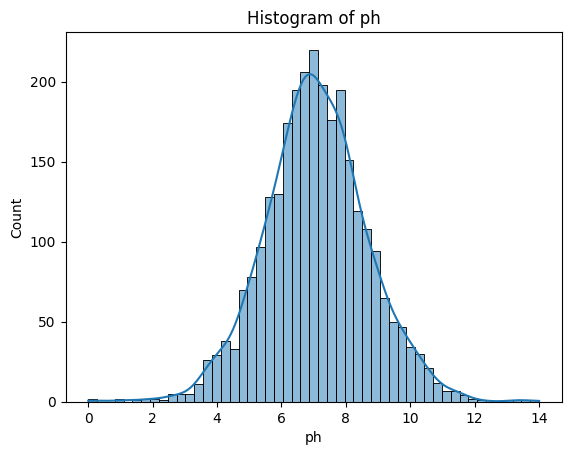

In [171]:
sns.histplot(df['ph'], kde=True)
plt.title('Histogram of ph')
plt.show()

by visulaising the distruibition and statistal analysis we found that it's normally distributed and we can replace with mean

### nulls replacment

In [172]:
# df['ph'].fillna(df['ph'].mean(),inplace = True)

In [173]:
# df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
for col in df.columns:
    df[col] = df[col].fillna(df.groupby('Potability')[col].transform('mean'))

In [174]:
# check to see if there is still nulls remaining
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [175]:
#check to see if there is duplicats data
df.duplicated().sum()

0

## outliers

In [176]:
# calculating number of outliers with iqr
for col in df.columns:
  if col== "Potability":
      continue
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col}  before deletion: {outliers}")





The number of outliers in ph  before deletion: 142
The number of outliers in Hardness  before deletion: 83
The number of outliers in Solids  before deletion: 47
The number of outliers in Chloramines  before deletion: 61
The number of outliers in Sulfate  before deletion: 264
The number of outliers in Conductivity  before deletion: 11
The number of outliers in Organic_carbon  before deletion: 25
The number of outliers in Trihalomethanes  before deletion: 54
The number of outliers in Turbidity  before deletion: 19


In [177]:
# df
# for col in df.columns:
#     if col== "Potability":
#         continue
#     # Calculate the first and third quartiles
#     q1 = np.percentile(df[col], 25)
#     q3 = np.percentile(df[col], 75)

#     # Calculate the interquartile range (IQR)
#     iqr = (q3 - q1) * 1.5

#     # Calculate the lower and upper bounds
#     lower_bound = q1 - iqr
#     upper_bound = q3 + iqr

#     # Replace outliers with the upper bound and lower bound values
#     df[col] = np.where(df[col] < lower_bound, lower_bound,np.where(df[col] > upper_bound, upper_bound, df[col]))


for col in df.columns:
    if col == "Potability":
        continue

    # Calculate the first and third quartiles
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)

    # Calculate the interquartile range (IQR)
    iqr = (q3 - q1) * 1.5

    # Calculate the lower and upper bounds
    lower_bound = q1 - iqr
    upper_bound = q3 + iqr

    # Remove outliers by filtering the DataFrame
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



##  Resample

### target column balance check

<Axes: xlabel='Potability'>

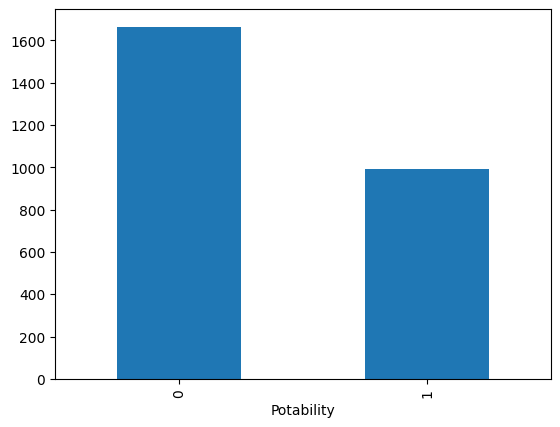

In [178]:
df["Potability"].value_counts().plot(kind='bar')

we have imbalnced data so we will oversample the minority class '1'

### oversampling

In [179]:
from sklearn.utils import resample
#spliting the data
notpotable  = df[df['Potability']==0]
potable = df[df['Potability']==1]
df_minority_upsampled = resample(potable, replace = True, n_samples = 1664)#oversampling

from sklearn.utils import shuffle
df = pd.concat([notpotable, df_minority_upsampled])#rejoining the data
# df = shuffle(df)#Shuffling the rows




Potability
0    1664
1    1664
Name: count, dtype: int64


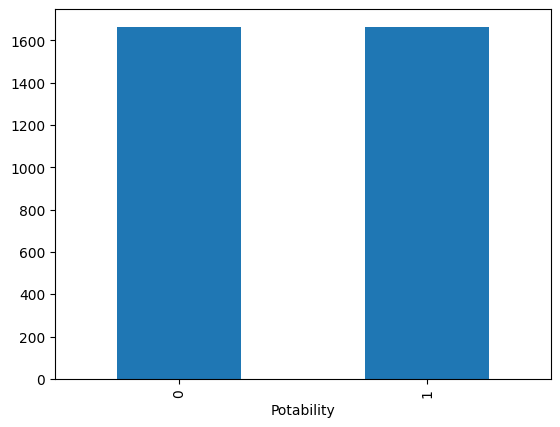

In [180]:
df["Potability"].value_counts().plot(kind='bar')
print(df['Potability'].value_counts())


## feature selection

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df.drop('Potability', axis=1)  # Features
y = df['Potability']  # Target
# Train a RandomForestClassifier to get feature importances
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importance_scores = clf.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Sort features by importance score (descending order)
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importance
print("Sorted Features by Importance:")
print(feature_importance_df_sorted)

Sorted Features by Importance:
           Feature  Importance
4          Sulfate    0.284472
0               ph    0.178177
1         Hardness    0.086531
2           Solids    0.083158
3      Chloramines    0.080165
6   Organic_carbon    0.073807
8        Turbidity    0.073441
7  Trihalomethanes    0.072933
5     Conductivity    0.067315


drop Organic_carbon, Conductivity, Trihalomethanes, Turbidity

In [182]:
# df.drop(columns=['Turbidity','Trihalomethanes','Conductivity'], inplace=True)

# ```modeling```

## preparing data for modeling

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [184]:
#spllitning the data
x=df.drop(columns=['Potability'])
y=df['Potability']




In [185]:
# st = StandardScaler()
# col= x.columns
# x[col] = st.fit_transform(x[col])
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be scaled
columns_to_scale = ['Hardness', 'Solids', 'Sulfate', 'Conductivity']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the selected columns in the DataFrame
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 42, stratify=y)



## logistic regession

In [187]:
# 1. create model from logistic class
logistic = LogisticRegression(random_state=0)
# 2. Fit the model to the training data
logistic.fit(X_train, y_train)
# 3. Predict on the test data
y_pred_test_logistic = logistic.predict(X_test)
# 4. Calculate accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred_test_logistic))


Accuracy: 0.493993993993994


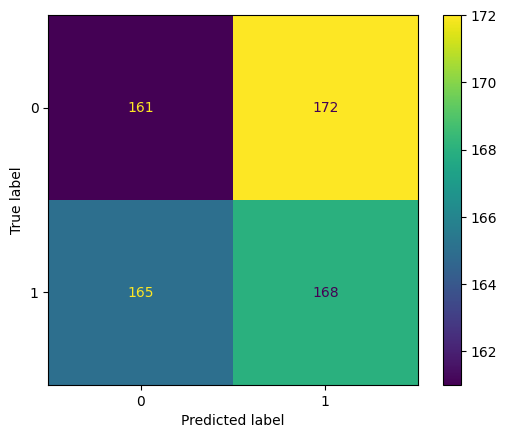

In [188]:
cm=confusion_matrix(y_test,y_pred_test_logistic)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## descion tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
# para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
# grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv

# Define the Decision Tree classifier with max_depth=10
dt = DecisionTreeClassifier()
# Fit the model to the training data
dt.fit(X_train, y_train)
# Predict on the test data
y_pred_test_dt = dt.predict(X_test)
# Calculate accuracy 
print("Accuracy:", accuracy_score(y_test, y_pred_test_dt))


Accuracy: 0.8573573573573574


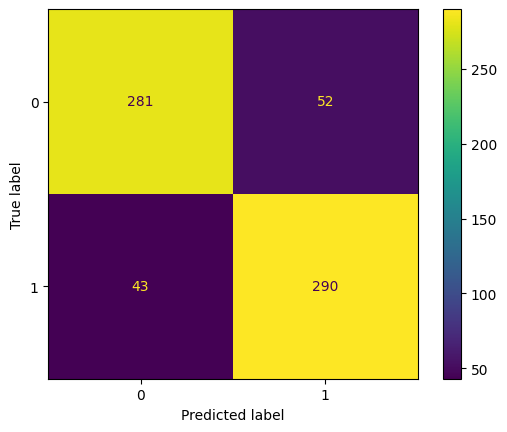

In [190]:
cm=confusion_matrix(y_test,y_pred_test_dt)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## Random forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
params_rf = param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=10,scoring='')
#grid_rf.fit(X_train, y_train)
#best_params = grid_rf.best_params_
# best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the final model using the best hyperparameters
# best_rf_model.fit(X_train, y_train)

# Evaluate the final model on the test set
# test_accuracy = best_rf_model.score(X_test, y_test)
# test_accuracy = best_rf_model.score(X_test, y_test)
rf.fit(X_train, y_train)
y_pred_test_rf = rf.predict(X_test)
print("Accuracy:" ,accuracy_score(y_test,y_pred_test_rf))

Accuracy: 0.9084084084084084


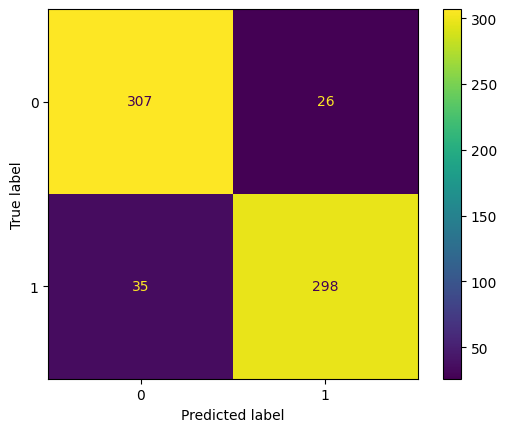

In [192]:
cm=confusion_matrix(y_test,y_pred_test_rf)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## KNN

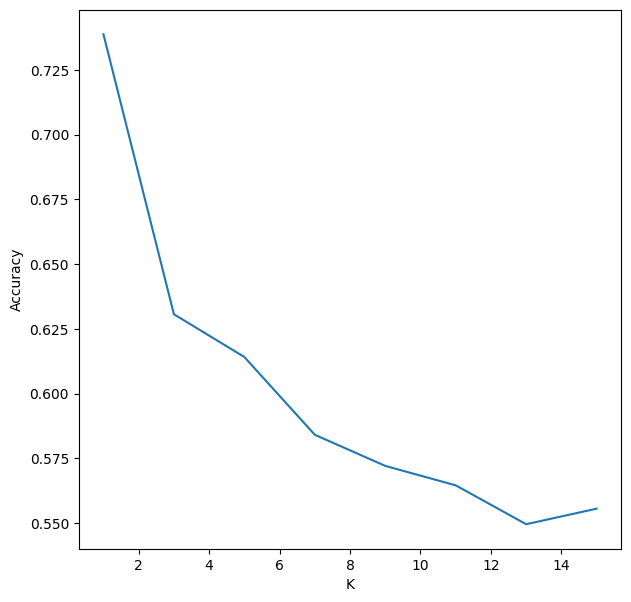

In [193]:
from sklearn.neighbors import KNeighborsClassifier
wss=[]
for k in range (1,16,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train,y_train)
    s=knn.score(X_test, y_test)
    wss.append(s)
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(1,16,2),wss)    

In [194]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

scores_knn = cross_val_score(knn, X_train, y_train, cv=10,scoring="accuracy")
print(scores_knn.mean())

0.7295288783757146


In [195]:
y_pred_test_knn=knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test_knn))

Accuracy: 0.7387387387387387


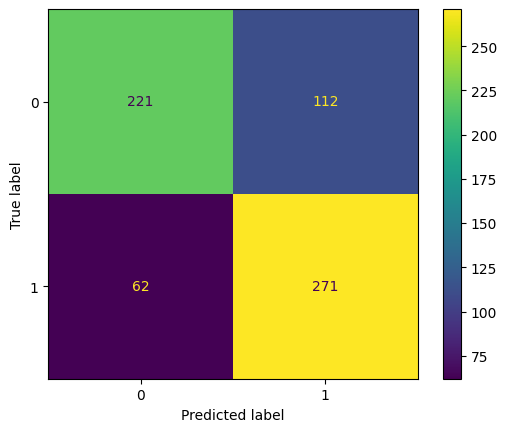

In [196]:
cm=confusion_matrix(y_test,y_pred_test_knn)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## SVM

In [197]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Base SVM model
# Define the hyperparameter grid
# param_grid = {
#     'C': [0.1, .01, 10],
#     # 'gamma': ['scale', 'auto']
#         'gamma': [.1, 1, 10]  # Adjusted gamma values

# }
param_grid = {
    'C': [0.01, 1, 0.1],  # Decreased values for C
    'gamma': [0.01, 0.1, .1]  # Decreased values for gamma
}

# Perform grid search with cross-validation
# grid_search = GridSearchCV(support, param_grid, cv=5)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Create a new SVM classifier with the best hyperparameters
# best_support = svm.SVC(**best_params, random_state=42)
# Fit the model to the training data
# best_support.fit(X_train, y_train)

base_model = SVC(kernel='rbf', random_state=42,gamma= 1,C =0.3)
# Bagging classifier
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
# Evaluate the ensemble model
test_accuracy_bagging = bagging_model.score(X_test, y_test)
y_pred_test_svm=bagging_model.predict(X_test)
print(f"Accuracy: {test_accuracy_bagging}")


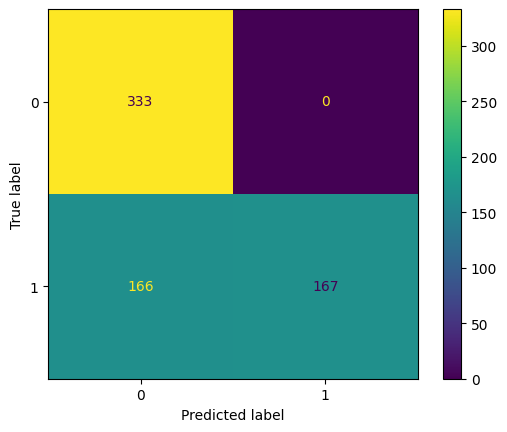

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=confusion_matrix(y_test,y_pred_test_svm)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

## esnmable models

In [ ]:
from sklearn.ensemble import StackingClassifier
# Base models
base_models = [
    ('svm', SVC(C=0.4, kernel='rbf', probability=True)),
    ('rf', RandomForestClassifier(random_state=42,max_depth=10)),
    ('knn', KNeighborsClassifier(n_neighbors=1))
]
# Meta-learner
meta_model = LogisticRegression()
# Stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)
# Evaluate the ensemble model
print("Test Accuracy: ", stacking_model.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier
# Base models
model1 = LogisticRegression()
model2 =  RandomForestClassifier(random_state=42)
model3 = SVC(C=1, kernel='rbf', probability=True)
# Voting classifier
voting_model = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('svm', model3),
], voting='soft')  # 'hard' for majority voting, 'soft' for weighted voting
voting_model.fit(X_train, y_train)
# Evaluate the ensemble model
test_accuracy = voting_model.score(X_test, y_test)
print(f"Accuracy: {test_accuracy}")


Accuracy: 0.9069069069069069


In [ ]:
from xgboost import XGBClassifier
# Create XGBoost model
xgboost = XGBClassifier()
# Fit the XGBoost model to the training data
xgboost.fit(X_train, y_train)
# Predict on the test data using XGBoost
y_pred_test_xgboost = xgboost.predict(X_test)
# Calculate accuracy using XGBoost
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_test_xgboost))

Accuracy (XGBoost): 0.9084084084084084
